<h1 align = 'center'>DS200 - PE5: SVM<h1>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

Similar to Seaborn, Sklearn also comes with some testing dataset. We'll use the built in breast cancer dataset from Scikit Learn with the `load_breast_cancer` function.

In [2]:
# Run this line to have the function
from sklearn.datasets import load_breast_cancer

Load the data into a dictionary named **cancer**. 

In [3]:
# load the data into a dict
cancer = load_breast_cancer()



Since the dataset is presented in a dictionary type, let's mess around with the keys from the dictionary a bit. 

In [4]:
# Show all the keys from cancer dict
cancer.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

We can grab values out of this dictionary using the right keys to set up our DataFrame. For example, find the values from the key `feature_names`

In [5]:
cancer['feature_names']



array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Set up DataFrame

Load the features and labels and supply the correct column names to set up the DataFrame. Let's name the label column `label`

In [6]:
df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])




In [8]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
df['label'] = cancer['target']

Check out the information of the DataFrame

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Now let's check out the first 5 rows of the dataframe!

In [12]:
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Study the basic statistics from the DataFrame.

In [13]:
df.describe()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Exploratory Data Analysis



Since most of us lack the domain knowledge of cancer or tumor cells, we will just perform a few simple EDA here.

Recreate the following plot.

In [15]:
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

<AxesSubplot:xlabel='label', ylabel='count'>

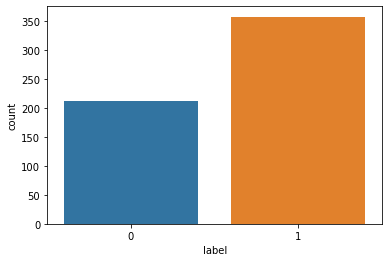

In [16]:
sns.countplot(data=df, x='label')



Show the correlation of all columns from the DataFrame in a heatmap.

<AxesSubplot:>

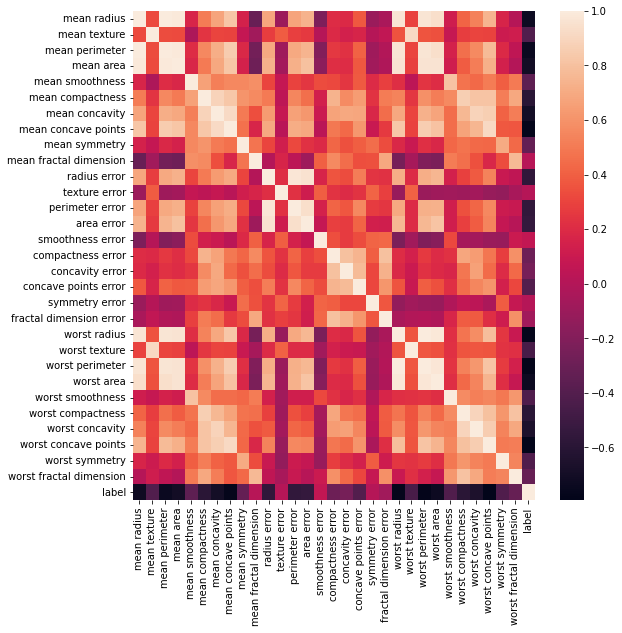

In [20]:
plt.figure(figsize=(9,9)) 
sns.heatmap(data=df.corr(), vmax=1)




Grab the columns of **'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity'** for pairplot. Color code the data points with `label` information.

In [21]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [98]:
pairplotdata = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'label']]



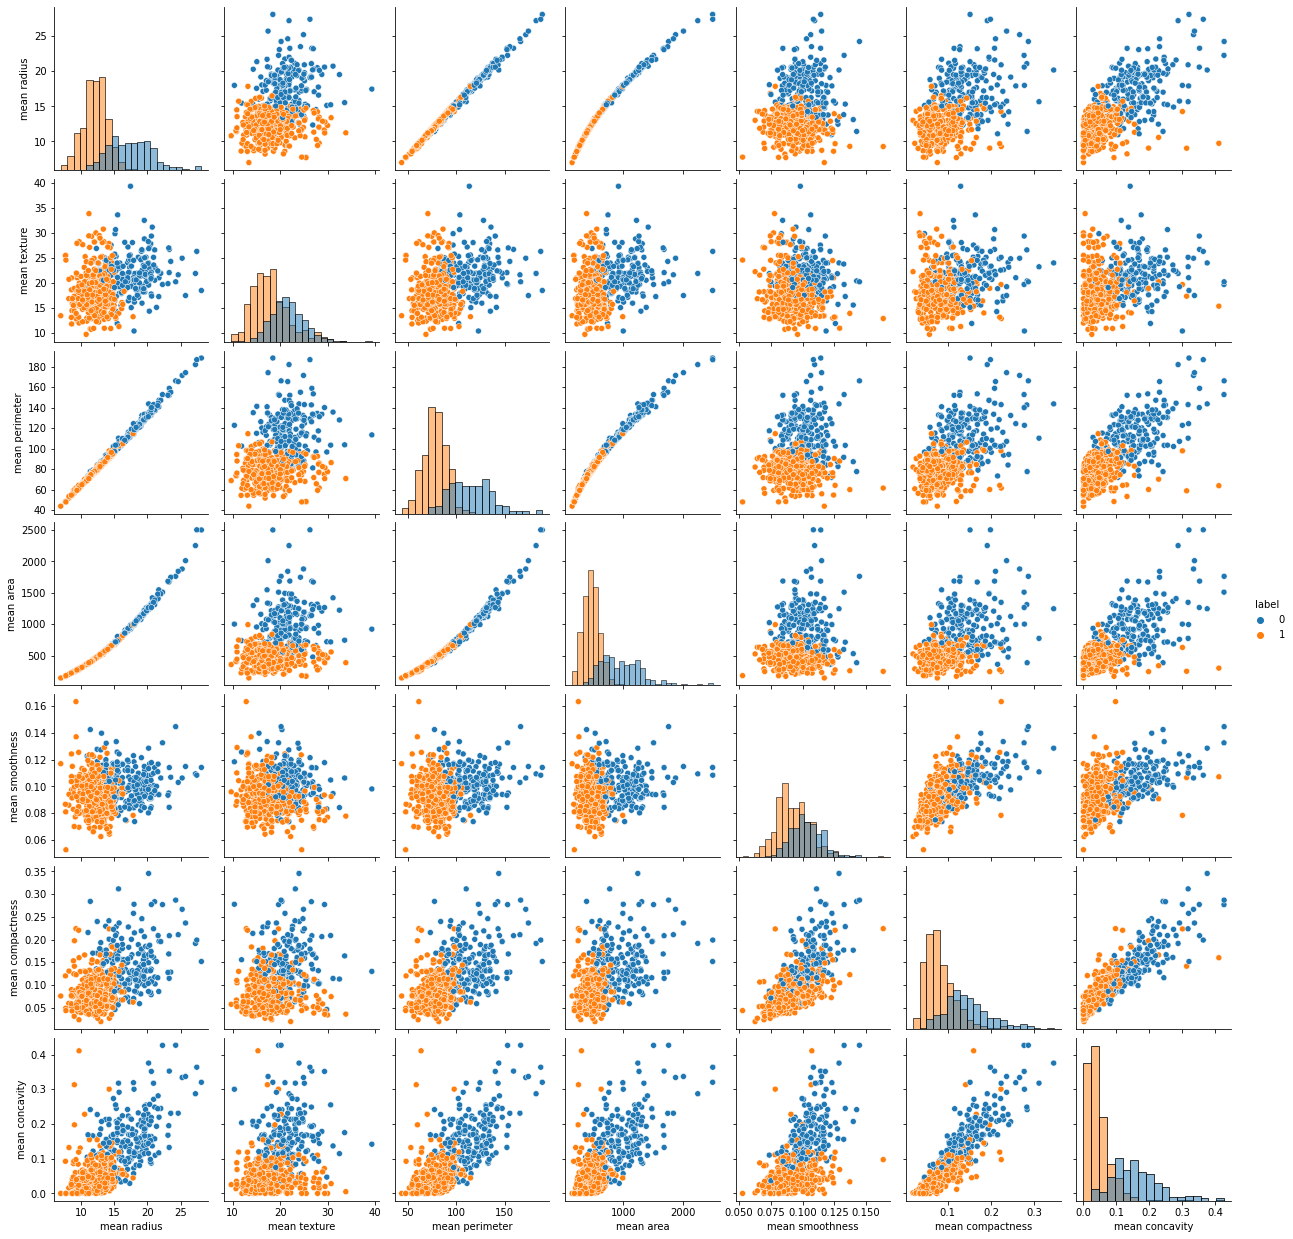

In [68]:
sns.pairplot(data=pairplotdata, diag_kind='hist', hue='label')


## Train Test Split

Prepare the X feature matrix and y label vector

In [119]:
X = df.drop('label', axis=1)

y = df['label']


Standardize all the features so that they have zero mean and standard deviation. 

In [120]:
from sklearn.preprocessing import StandardScaler


In [122]:
X = StandardScaler().fit_transform(X)



Split the dataset into training (70%) and testing (30%). Use random seed as 101

In [123]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=101)





# Train the Support Vector Classifier

Use all default parameters for the SVC classifier

In [104]:
from sklearn.svm import SVC

In [105]:
# Fit the SVM model
model = SVC(random_state=101)

model.fit(X_train, y_train)

SVC(random_state=101)

## Predictions and Evaluations

Now let's predict using the trained model.

In [106]:
predictions = model.predict(X_test)



Show the confusion matrix and classification report.

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 63   3]
 [  1 104]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with `GridSearchCV`! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

Use the following setting for the parameter grid.
```
C = [0.1,1, 10, 100, 1000], 
gamma = [1,0.1,0.01,0.001,0.0001], 
kernel = ['linear', 'rbf'] 
```

In [109]:
# Create the parameter grid dictionary

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear', 'rbf']} 




One of the great things about `GridSearchCV` is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add `refit=True` and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [110]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [124]:
# Create a grid of estimators
grid = GridSearchCV(estimator=SVC(random_state=101),
                    param_grid=param_grid,
                    refit=True,
                    cv=5,
                    verbose=3)

What fit does is a bit more involved than usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [125]:
# Train a grid of estimators
grid.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 4/5] END ......C=100, ga

GridSearchCV(cv=5, estimator=SVC(random_state=101),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the `best_params_` attribute, and the best estimator in the `best_estimator_` attribute:

In [127]:
# Find the best parameters
grid.best_params_



{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [129]:
# Find the best estimator object
grid.best_estimator_



SVC(C=0.1, gamma=1, kernel='linear', random_state=101)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [130]:
# Generate predictions from the best model

grid_predictions = grid.predict(X_test)



Show the confusion matrix and classification report.

In [131]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[ 62   4]
 [  0 105]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.96      1.00      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



# Great job!